In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from datetime import timedelta
from scipy.stats import zscore

In [21]:
data = pd.read_csv("Minute Bars.csv")

In [22]:
data.head()

,Dates_SPX,Open_SPX,Close_SPX,Dates_XP1,Open_XP1,Close_XP1
0,12/1/2023 9:30:00 AM,4559.43,4557.01,12/1/2023 9:30:00 AM,7092,7094
1,12/1/2023 9:35:00 AM,4556.92,4560.46,12/1/2023 9:35:00 AM,7094,7100
2,12/1/2023 9:40:00 AM,4560.51,4563.17,12/1/2023 9:40:00 AM,7100,7105
3,12/1/2023 9:45:00 AM,4563.23,4563.29,12/1/2023 9:45:00 AM,7105,7107
4,12/1/2023 9:50:00 AM,4563.34,4564.95,12/1/2023 9:50:00 AM,7107,7110


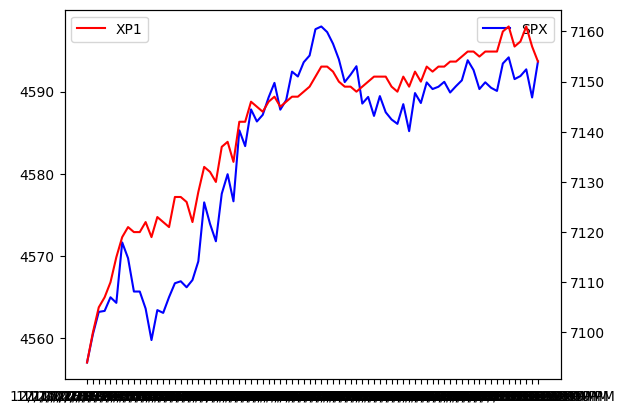

In [23]:
fig, ax1 = plt.subplots() 
ax1.plot(data["Dates_SPX"], data["Close_SPX"], color="blue", label="SPX")
ax2 = ax1.twinx()
ax2.plot(data["Dates_SPX"], data["Close_XP1"], color="red", label="XP1")
ax1.legend(loc=0)
ax2.legend(loc=0)

In [30]:
y = data["Close_XP1"]
X = data["Close_SPX"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_XP1   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     662.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.84e-39
Time:                        13:02:00   Log-Likelihood:                -237.77
No. Observations:                  78   AIC:                             479.5
Df Residuals:                      76   BIC:                             484.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1256.3321    228.614      5.495      0.0

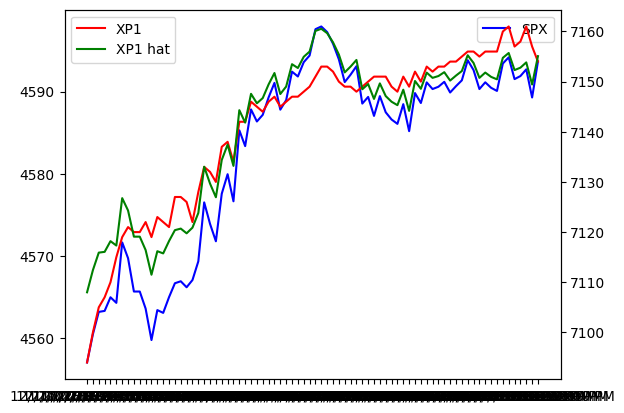

In [31]:
fig, ax1 = plt.subplots() 
ax1.plot(data["Dates_SPX"], data["Close_SPX"], color="blue", label="SPX")
ax2 = ax1.twinx()
ax2.plot(data["Dates_SPX"], data["Close_XP1"], color="red", label="XP1")
ax2.plot(data["Dates_SPX"], results.fittedvalues, color="green", label="XP1 hat")
ax1.legend(loc=0)
ax2.legend(loc=0)

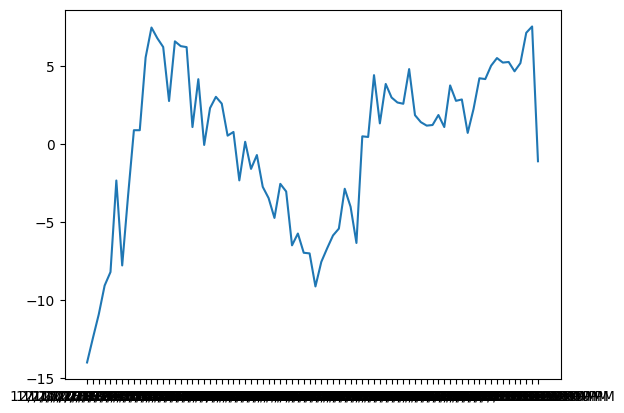

In [32]:
residual = data["Close_XP1"] - results.fittedvalues
plt.plot(data["Dates_SPX"], residual)
# Need to pay transaction cost both sides, 3-5 bps one way maybe, so enter when residual is greater than 10 or 15

In [24]:
eu_data = pd.read_csv("EU Minute Bars.csv")

In [25]:
eu_data.head()

,Dates_SX5E,Open_SX5E,Close_SX5E,Dates_XP1,Open_XP1,Close_XP1
0,12/1/2023 3:00:00 AM,4393.04,4406.11,12/1/2023 3:00:00 AM,7088,7094
1,12/1/2023 3:05:00 AM,4405.61,4408.20,12/1/2023 3:05:00 AM,7093,7099
2,12/1/2023 3:10:00 AM,4409.32,4406.10,12/1/2023 3:10:00 AM,7099,7100
3,12/1/2023 3:15:00 AM,4406.95,4407.73,12/1/2023 3:15:00 AM,7100,7100
4,12/1/2023 3:20:00 AM,4406.79,4403.84,12/1/2023 3:20:00 AM,7100,7097


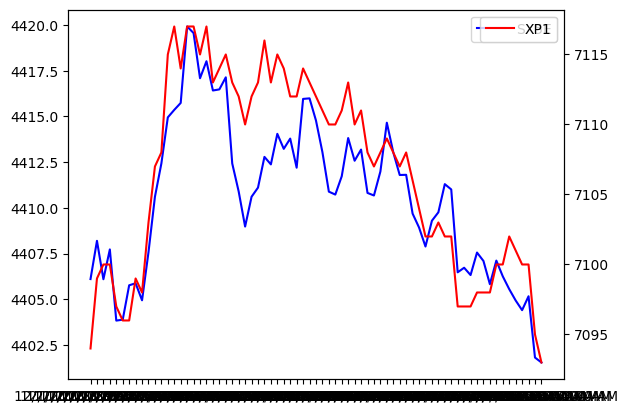

In [26]:
fig, ax1 = plt.subplots() 
ax1.plot(eu_data.iloc[:71, :]["Dates_SX5E"], eu_data.iloc[:71, :]["Close_SX5E"], color="blue", label="SX5E")
ax2 = ax1.twinx()
ax2.plot(eu_data.iloc[:71, :]["Dates_SX5E"], eu_data.iloc[:71, :]["Close_XP1"], color="red", label="XP1")
ax1.legend(loc=0)
ax2.legend(loc=0)

In [40]:
y = eu_data.iloc[:71, :]["Close_XP1"]
X = eu_data.iloc[:71, :]["Close_SX5E"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_XP1   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     355.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           6.15e-29
Time:                        13:27:54   Log-Likelihood:                -174.07
No. Observations:                  71   AIC:                             352.1
Df Residuals:                      69   BIC:                             356.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        478.9525    351.392      1.363      0.1

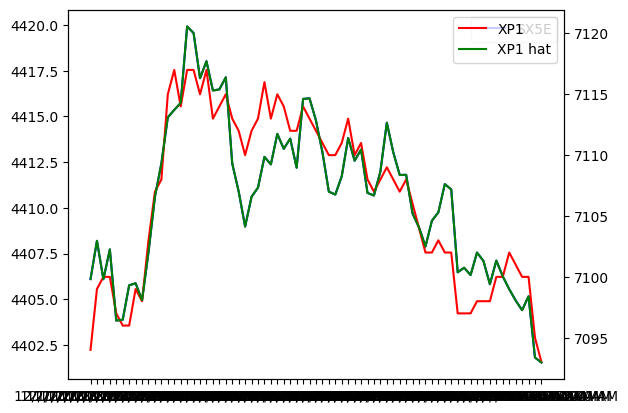

In [47]:
fig, ax1 = plt.subplots() 
ax1.plot(eu_data.iloc[:71, :]["Dates_SX5E"], eu_data.iloc[:71, :]["Close_SX5E"], color="blue", label="SX5E")
ax2 = ax1.twinx()
ax2.plot(eu_data.iloc[:71, :]["Dates_SX5E"], eu_data.iloc[:71, :]["Close_XP1"], color="red", label="XP1")
ax2.plot(eu_data.iloc[:71, :]["Dates_SX5E"], results.fittedvalues, color="green", label="XP1 hat")
ax1.legend(loc=0)
ax2.legend(loc=0)

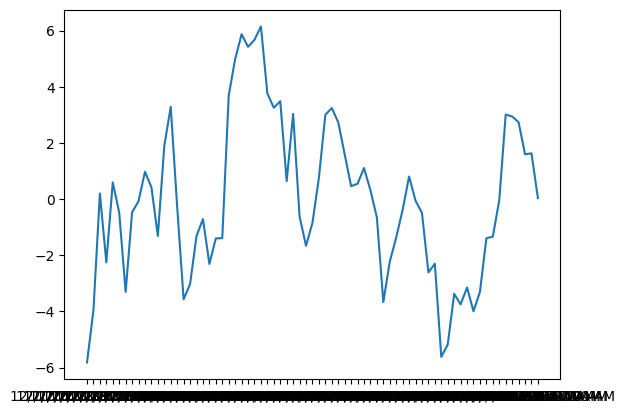

In [43]:
residual = eu_data.iloc[:71, :]["Close_XP1"] - results.fittedvalues
plt.plot(eu_data.iloc[:71, :]["Dates_SX5E"], residual)

In [57]:
x_index = "SPX"
x_df = pd.read_csv("index/{}.csv".format(x_index))
x_df["Dates"] = pd.to_datetime(x_df["Dates"])

In [58]:
y_instrument = "XP1"
y_df = pd.read_csv("futures/{}.csv".format(y_instrument))
y_df["Dates"] = pd.to_datetime(y_df["Dates"])

In [139]:
overlap_df = pd.merge(left=x_df, right=y_df, left_on="Dates", right_on="Dates", how="inner", suffixes=["", "_y"])
overlap_df["IntradayRet"] = overlap_df["Close"] / overlap_df["Open"] - 1
overlap_df["IntradayRet_y"] = overlap_df["Close_y"] / overlap_df["Open_y"] - 1

In [140]:
overlap_df.head(20)

,Dates,Open,Close,Open_y,Close_y,Volume,IntradayRet,IntradayRet_y
0,2023-05-19 09:30:00,4204.15,4211.47,7310,7309,974,0.001741,-0.000137
1,2023-05-19 10:00:00,4211.59,4211.38,7308,7304,569,-0.000050,-0.000547
2,2023-05-19 10:30:00,4211.24,4209.03,7305,7306,568,-0.000525,0.000137
3,2023-05-19 11:00:00,4209.00,4191.72,7306,7289,1041,-0.004105,-0.002327
4,2023-05-19 11:30:00,4191.48,4191.13,7288,7284,1454,-0.000084,-0.000549
5,2023-05-19 12:00:00,4191.12,4188.55,7283,7281,393,-0.000613,-0.000275
6,2023-05-19 12:30:00,4188.24,4192.57,7280,7286,418,0.001034,0.000824
7,2023-05-19 13:00:00,4192.55,4193.64,7287,7290,173,0.000260,0.000412
8,2023-05-19 13:30:00,4193.64,4185.99,7289,7284,143,-0.001824,-0.000686
9,2023-05-19 14:00:00,4186.00,4184.68,7284,7282,199,-0.000315,-0.000275


In [150]:
t1 = 14
deltat = 14
t2 = t1 + deltat

In [151]:
y = overlap_df.iloc[t1:t2, :]["Close_y"]
X = overlap_df.iloc[t1:t2, :]["Close"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Close_y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     51.26
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.15e-05
Time:                        16:01:13   Log-Likelihood:                -23.205
No. Observations:                  14   AIC:                             50.41
Df Residuals:                      12   BIC:                             51.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3598.5155    516.022      6.974      0.0

/Users/weizhang/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


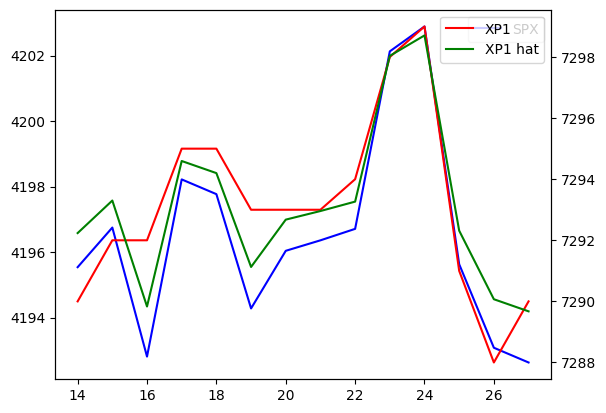

In [152]:
fig, ax1 = plt.subplots()
ax1.plot(overlap_df.iloc[t1:t2, :]["Close"], color="blue", label="SPX")
ax2 = ax1.twinx()
ax2.plot(overlap_df.iloc[t1:t2, :]["Close_y"], color="red", label="XP1")
ax2.plot(results.fittedvalues, color="green", label="XP1 hat")
ax1.legend(loc=0)
ax2.legend(loc=0)

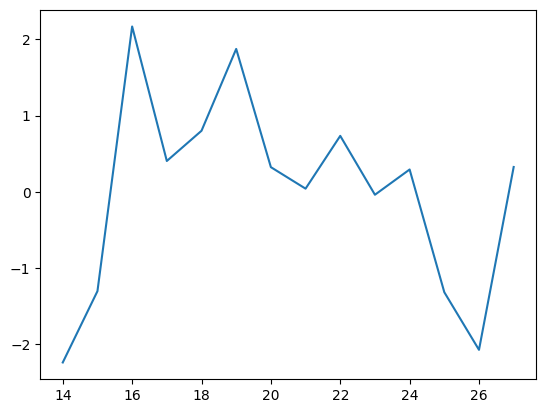

In [153]:
residual = overlap_df.iloc[t1:t2, :]["Close_y"] - results.fittedvalues
plt.plot(residual)

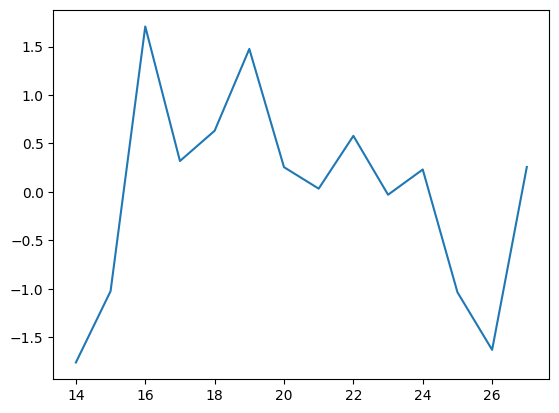

In [154]:
zscores = zscore(residual)
plt.plot(zscores)

In [155]:
t3 = t2 + deltat
y_hat = results.params[0] + results.params[1] * overlap_df.iloc[t2:t3, :]["Close"]

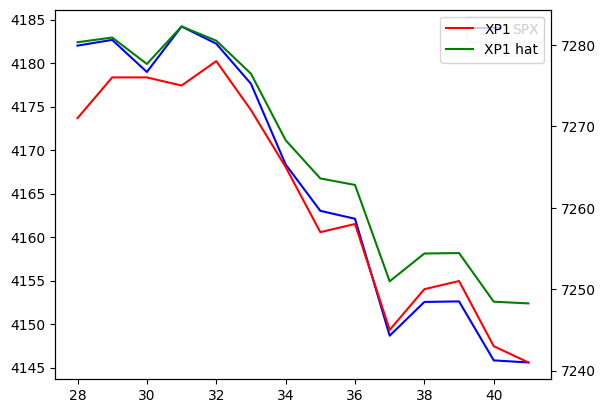

In [156]:
fig, ax1 = plt.subplots()
ax1.plot(overlap_df.iloc[t2:t3, :]["Close"], color="blue", label="SPX")
ax2 = ax1.twinx()
ax2.plot(overlap_df.iloc[t2:t3, :]["Close_y"], color="red", label="XP1")
ax2.plot(y_hat, color="green", label="XP1 hat")
ax1.legend(loc=0)
ax2.legend(loc=0)

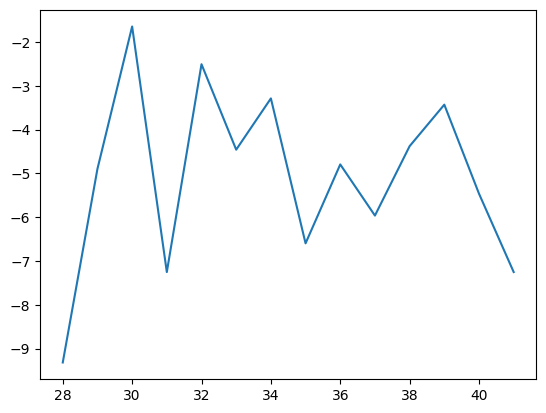

In [157]:
residual = overlap_df.iloc[t2:t3, :]["Close_y"] - y_hat
plt.plot(residual)

In [158]:
y = overlap_df.iloc[t1:t2, :]["IntradayRet_y"]
X = overlap_df.iloc[t1:t2, :]["IntradayRet"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          IntradayRet_y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     28.52
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           0.000176
Time:                        16:01:34   Log-Likelihood:                 96.921
No. Observations:                  14   AIC:                            -189.8
Df Residuals:                      12   BIC:                            -188.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.131e-05   6.88e-05     -0.310      

/Users/weizhang/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [159]:
ret_hat = results.params[0] + results.params[1] * overlap_df.iloc[t2:t3, :]["IntradayRet"]

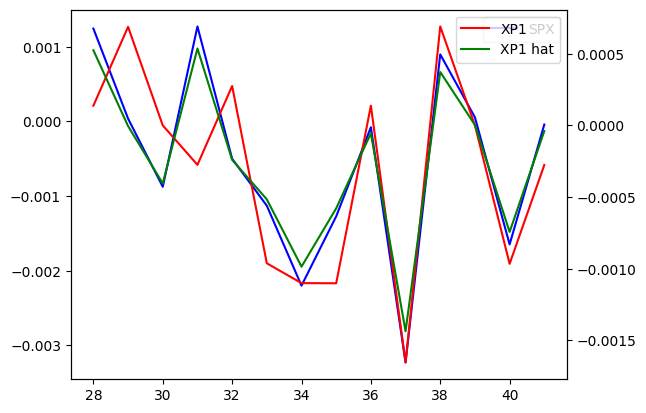

In [160]:
fig, ax1 = plt.subplots()
ax1.plot(overlap_df.iloc[t2:t3, :]["IntradayRet"], color="blue", label="SPX")
ax2 = ax1.twinx()
ax2.plot(overlap_df.iloc[t2:t3, :]["IntradayRet_y"], color="red", label="XP1")
ax2.plot(ret_hat, color="green", label="XP1 hat")
ax1.legend(loc=0)
ax2.legend(loc=0)

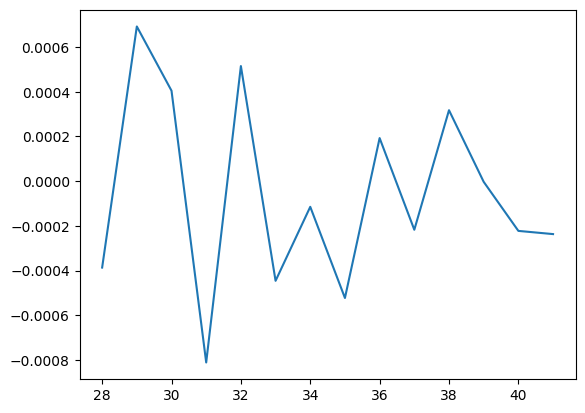

In [161]:
residual = overlap_df.iloc[t2:t3, :]["IntradayRet_y"] - ret_hat
plt.plot(residual)

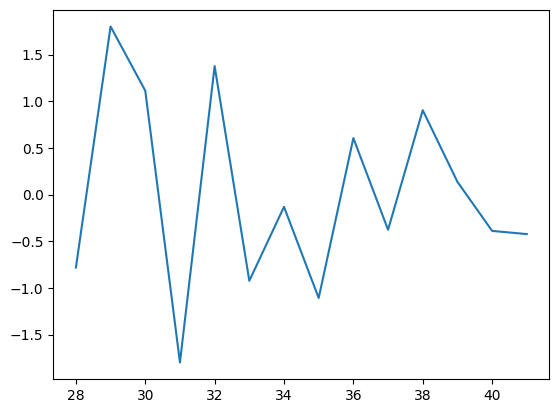

In [162]:
zscores = zscore(residual)
plt.plot(zscores)

In [173]:
deltat = 14
residuals = []
zscore_list = []
for i in range(0, 100):
    t1 = i * deltat
    t2 = t1 + deltat
    t3 = t2 + deltat

    y = overlap_df.iloc[t1:t2, :]["IntradayRet_y"]
    X = overlap_df.iloc[t1:t2, :]["IntradayRet"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    # print(results.params)

    ret_hat = results.params[0] + results.params[1] * overlap_df.iloc[t2:t3, :]["IntradayRet"]
    residual = overlap_df.iloc[t2:t3, :]["IntradayRet_y"] - ret_hat
    zscores = zscore(residual)
    residuals.extend(residual.values)
    zscore_list.extend(zscores)

(array([  5.,  11.,  23., 130., 659., 477.,  78.,  15.,   1.,   1.]),
 array([-0.00364533, -0.00289251, -0.00213969, -0.00138687, -0.00063406,
         0.00011876,  0.00087158,  0.0016244 ,  0.00237722,  0.00313003,
         0.00388285]),
 <BarContainer object of 10 artists>)

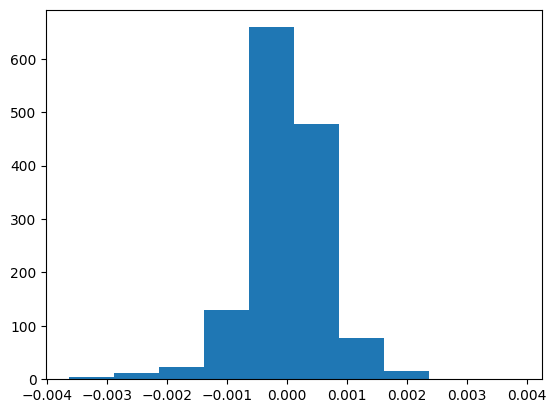

In [174]:
plt.hist(residuals)

(array([ 10.,  31.,  65., 169., 373., 387., 237.,  78.,  41.,   9.]),
 array([-3.37860985, -2.71723069, -2.05585154, -1.39447238, -0.73309322,
        -0.07171406,  0.5896651 ,  1.25104425,  1.91242341,  2.57380257,
         3.23518173]),
 <BarContainer object of 10 artists>)

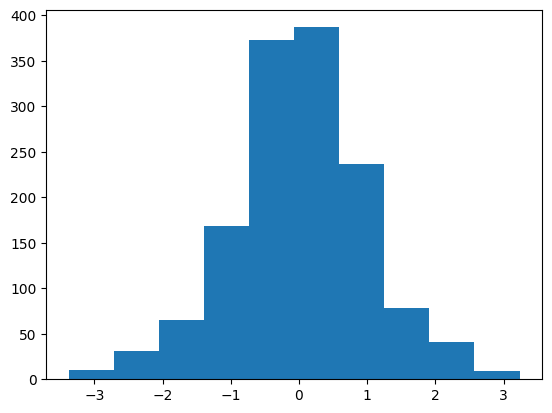

In [175]:
plt.hist(zscore_list)